# Given

In [3]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# print(market_data_df.isna().sum())

# market_data_df.fillna(market_data_df.mean(), inplace=True)

# My Code

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, index=market_data_df.index, columns=market_data_df.columns)
market_data_scaled_df.head()

"""Instead of breaking up this code into multiple lines, I did it in the previous two.
Breaking it into multiple lines was causing some errors with certain columns"""


# Copy the crypto names from the original dataS
# # Set the coinid column as index

# columns_to_update = [
#     'price_change_percentage_24h',
#     'price_change_percentage_30d', 
#     'price_change_percentage_60d',
#     'price_change_percentage_200d', 
#     'price_change_percentage_1y'
# ]

# for col in columns_to_update:
#     market_data_df[col] = market_data_scaled_df[col]

# Checked to make sure the columns matched up for the new dataframe
# print(market_data_scaled_df.columns)

"""I originally had a for loop that was trying to update the columns, left it here commented out to show LOE"""

# Display sample data


'I originally had a for loop that was trying to update the columns, left it here commented out to show LOE'

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1, n_init=10)
    model.fit(market_data_scaled_df)
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k_values,
              "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


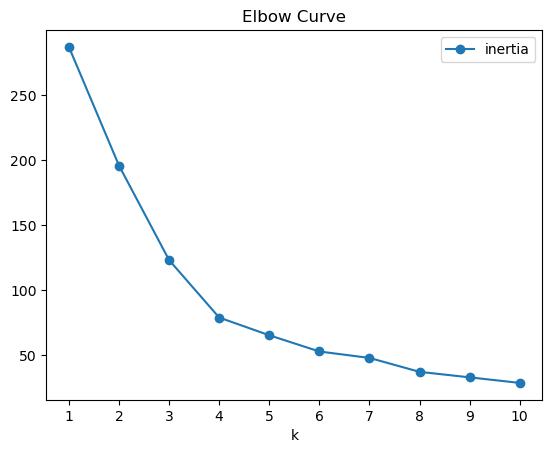

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.plot.line(x='k',
                                y='inertia',
                                title="Elbow Curve", 
                                xticks=k_values,
                                marker='o')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** A range from 6 to 8 would be acceptable for leveling out of the elbow curve. If I had to choose one, I would go with 7 as it's the earliest number of the leveling out.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=7, random_state=1)
model

KMeans(n_clusters=7, random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predict = model.predict(market_data_df)

# View the resulting array of cluster values.
print(cluster_predict)

[5 0 5 5 5 0 4 6 5 5 6 5 5 0 0 0 0 5 0 5 0 5 5 5 6 5 5 6 0 3 5 5 1 5 3 4 2
 5 0 5 4]


In [14]:
# Create a copy of the DataFrame
market_data_clustered = market_data_df.copy()

In [15]:
print(market_data_clustered.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [16]:
"""This was me figuring out why something wasn't working, please ignore"""
# try:
#     # Assuming 'market_data_scaled_df' is your DataFrame with scaled data
#     model = KMeans(n_clusters=7, n_init='auto', random_state=42)
#     model.fit(market_data_scaled_df)
#     cluster_labels = model.predict(market_data_scaled_df)
#     print(cluster_labels)
# except Exception as e:
#     print("An error occurred:", e)

"This was me figuring out why something wasn't working, please ignore"

In [17]:
# Add a new column to the DataFrame with the predicted clusters
market_data_clustered['Cluster'] = cluster_predict

# Display sample data
market_data_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,5
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,5
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,5
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,5


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

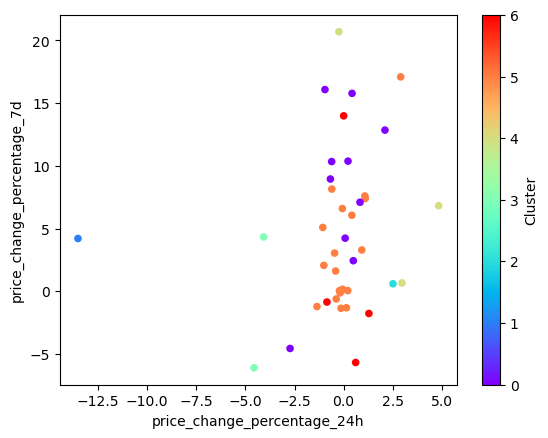

In [18]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_clustered.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='Cluster',
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
scaled_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
scaled_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [21]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variances = pca.explained_variance_ratio_
explained_variances

array([0.3719856 , 0.34700813, 0.17603793])

In [22]:
total_explained_variance = sum(explained_variances)
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 , 0.34700813, 0.17603793 respectively, or 0.895031657030984 in total

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
scaled_pca_df = pd.DataFrame(data = scaled_pca, columns = ["PCA1", "PCA2", "PCA3"], index=market_data_df.index)

# Set the coinid column as index


# Display sample data
scaled_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

# Create an empty list to store the inertia values

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve

# Display the DataFrame

k_values2 = range(1, 11)

inertia_values2 = []

for k2 in k_values2:
    model = KMeans(n_clusters=k2, random_state=1, n_init=10)
    model.fit(scaled_pca_df)
    inertia_values2.append(model.inertia_)

elbow_dict2 = {"k2": list(k_values2), "inertia2": inertia_values2}

elbow_df2 = pd.DataFrame(elbow_dict2)

print(elbow_df2)


   k2    inertia2
0   1  256.874086
1   2  165.901994
2   3   93.774626
3   4   49.665497
4   5   38.352251
5   6   27.618972
6   7   21.134056
7   8   17.437664
8   9   13.742792
9  10   10.484890


Note : 
Not sure why these numbers aren't aligning closer to the results shown in the starter ipynb

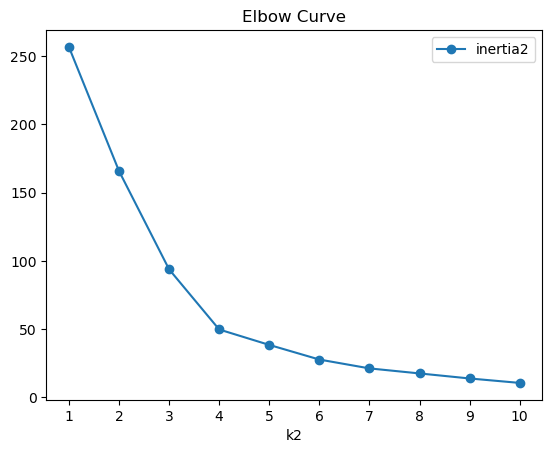

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot2 = elbow_df2.plot.line(x='k2',
                                y='inertia2',
                                title="Elbow Curve", 
                                xticks=k_values2,
                                marker='o')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
  The best value for k when using PCA data is 5.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  Yes, the k-value with PCA data is different from the original data k-value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=1)
model

KMeans(n_clusters=5, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(scaled_pca_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predict2 = model.predict(scaled_pca_df)

# Print the resulting array of cluster values.
print(cluster_predict2)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 4 3 3 3 0 4 3 3 1 0 3 4 2
 3 3 3 3]


In [29]:
# Create a copy of the DataFrame with the PCA data
cluster_PCA_df = scaled_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
cluster_PCA_df['crypto_cluster'] = cluster_predict2

# Display sample data
cluster_PCA_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

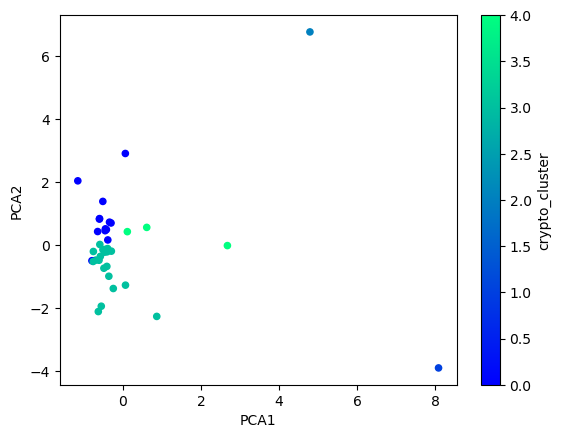

In [30]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
cluster_PCA_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c='crypto_cluster',
    colormap="winter")

### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index.
# market_data_scaled_df = cluster_PCA_df.reset_index()

# market_data_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,5
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,5
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,5
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,5


In [35]:
weights = pd.DataFrame(pca.components_.T, columns=['PCA1','PCA2','PCA3'], index=market_data_df.columns)
weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:**
    Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    PCA1: Strongest positive = price_change_percentage_200d at 0.594468 , Strongest negative = price_change_percentage_24h at -0.416728
    PCA2: Strongest positive = price_change_percentage_30d at 0.562182 ,  Strongest negative = price_change_percentage_1y at -0.150789
    PCA3: Strongest positive = price_change_percentage_7d at 0.787670 , Strongest negative = price_change_percentage60d at -0.361377
    Overall Strongest positive = price_change_percentage_7d at 0.78 , Strongest negative = price_change_percentage_24h at -0.416728

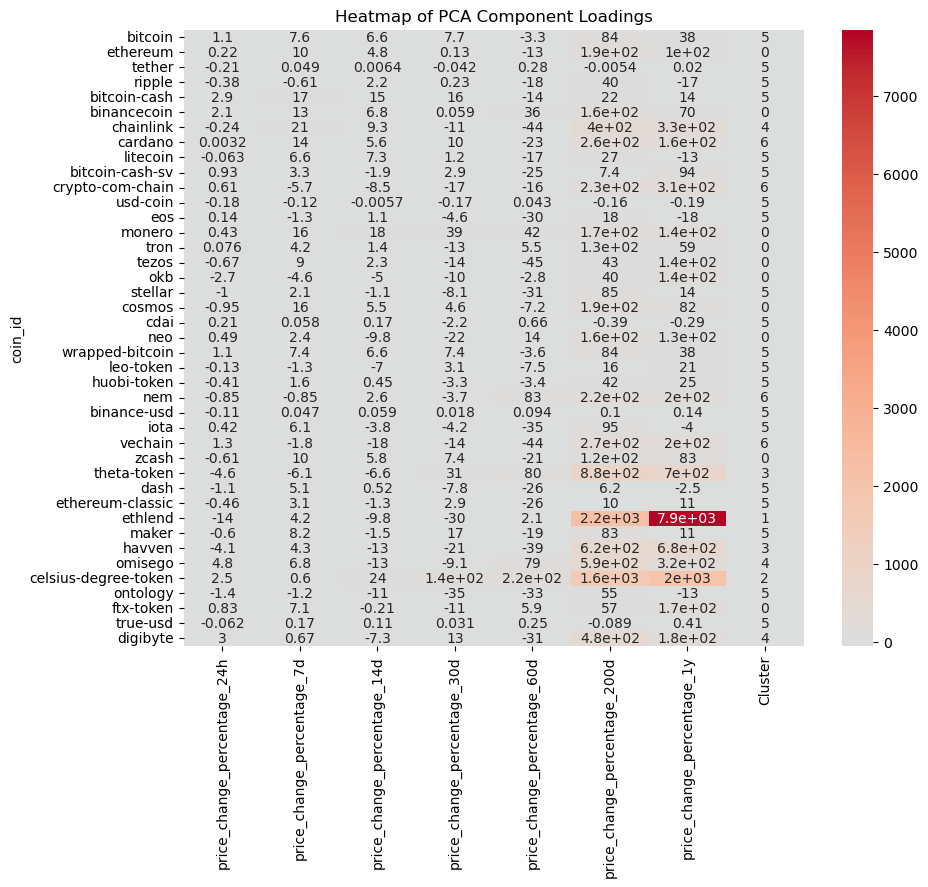

In [ ]:
"""Checked my readings on the numbers with a correlative heatmap, please ignore"""
plt.figure(figsize=(10, 8))
sns.heatmap(market_data_clustered, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of PCA Component Loadings')
plt.show()